Cleaned HDB Resale Prices EDA

In [16]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("HDB_Resale_Prices_Data_Engineered.csv")
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,quarter,storey_avg,lease_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,1,11.0,38,61.333333
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,1,2.0,39,60.583333
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,1,2.0,37,62.416667
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,1,5.0,37,62.083333
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,1,2.0,37,62.416667


In [18]:
df.shape

(193875, 14)

Understanding distribution of prices, lease age, floor 

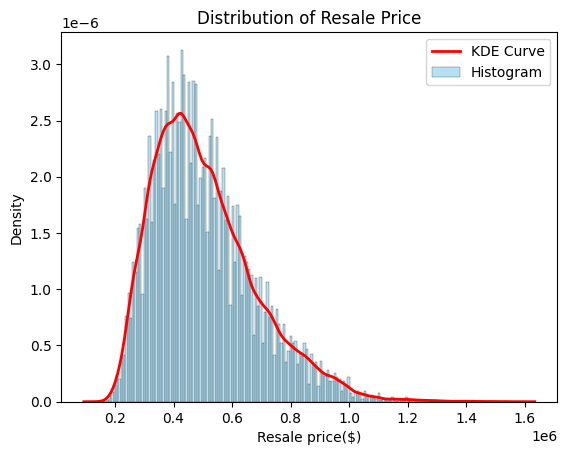

In [19]:
# Resale price distribution

sns.histplot(
    df['resale_price'],
    bins='fd',
    stat='density',
    color='skyblue',
    alpha=0.6,
    label='Histogram'
)

sns.kdeplot(
    df['resale_price'],
    color='red',
    linewidth=2,
    label='KDE Curve'
)

plt.legend()
plt.title('Distribution of Resale Price')
plt.xlabel('Resale price($)')
plt.ylabel('Density')
plt.show()

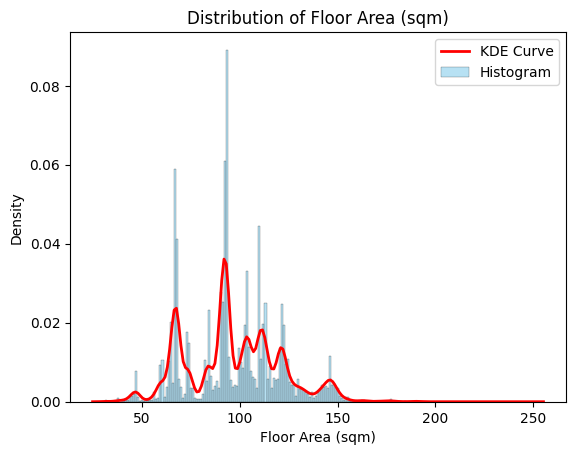

In [20]:
# Floor area distribution

sns.histplot(
    df['floor_area_sqm'],
    bins='fd',       
    stat='density',
    color='skyblue',
    alpha=0.6,
    label='Histogram'
)

sns.kdeplot(
    df['floor_area_sqm'],
    color='red',
    linewidth=2,
    label='KDE Curve'
)

plt.legend()
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Density')
plt.show()

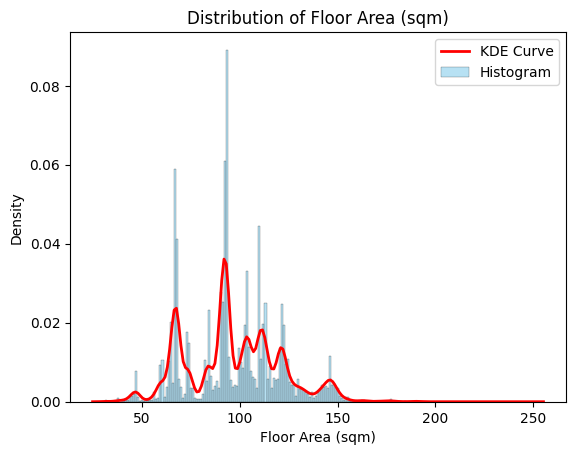

In [21]:
# Remaining lease distribution

sns.histplot(
    df['floor_area_sqm'],
    bins='fd',
    stat='density',
    color='skyblue',
    alpha=0.6,
    label='Histogram'
)

sns.kdeplot(
    df['floor_area_sqm'],
    color='red',
    linewidth=2,
    label='KDE Curve'
)

plt.legend()
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Density')
plt.show()

"Analzye structural attributes and resale price" "Investigate locational factors"

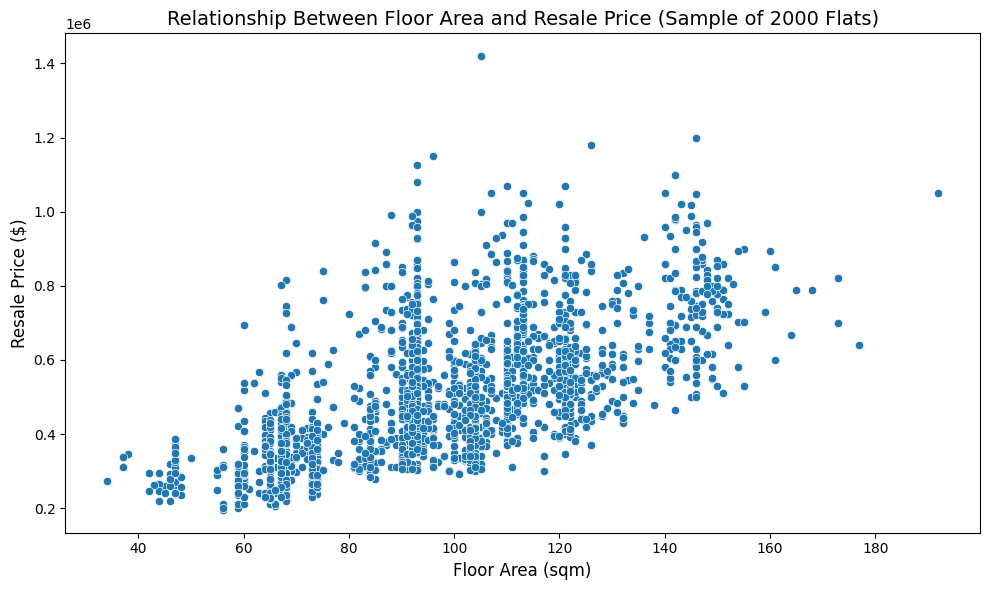

In [22]:
# Price vs Floor area

sample_df = df.sample(n=2000, random_state=42)
plt.figure(figsize=(10,6))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=sample_df)
plt.title("Relationship Between Floor Area and Resale Price (Sample of 2000 Flats)", fontsize=14)
plt.xlabel("Floor Area (sqm)", fontsize=12)
plt.ylabel("Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

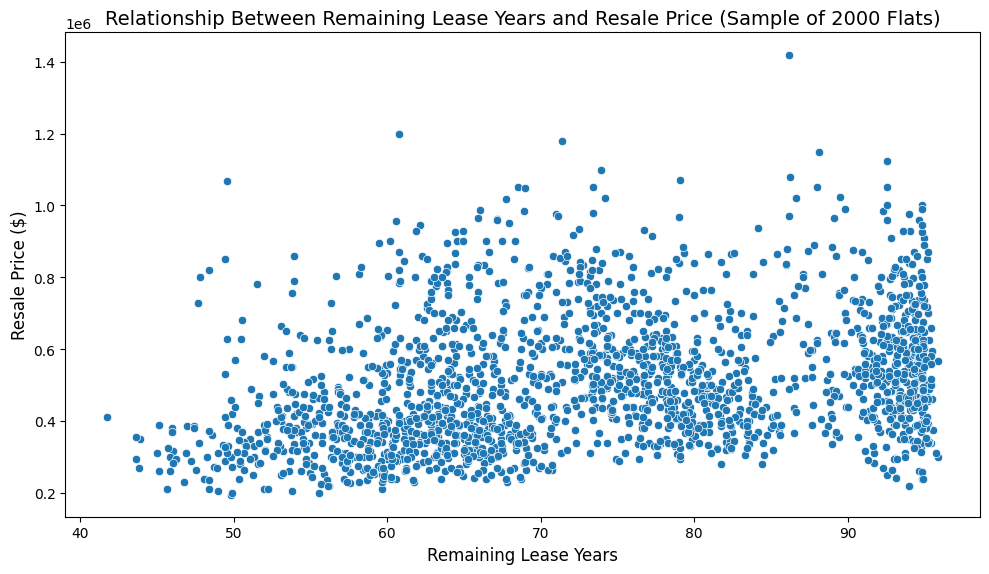

In [23]:
# Price vs remaining lease

sample_df = df.sample(n=2000, random_state=42)
plt.figure(figsize=(10,6))
sns.scatterplot(x='remaining_lease_years', y='resale_price', data=sample_df)
plt.title("Relationship Between Remaining Lease Years and Resale Price (Sample of 2000 Flats)", fontsize=14)
plt.xlabel("Remaining Lease Years", fontsize=12)
plt.ylabel("Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

"Effect of flat type, storey, and town on price variation"

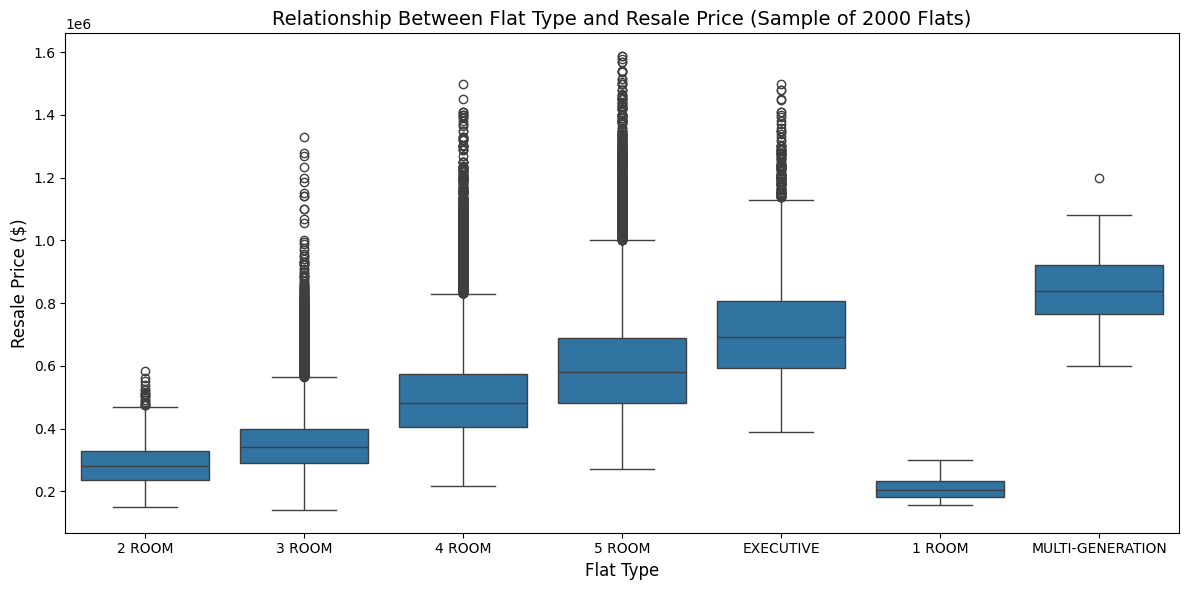

In [24]:
# Price by flat type

plt.figure(figsize=(12, 6))
sns.boxplot(x='flat_type',y='resale_price', data=df)
plt.title("Relationship Between Flat Type and Resale Price (Sample of 2000 Flats)", fontsize=14)
plt.xlabel("Flat Type", fontsize=12)
plt.ylabel("Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

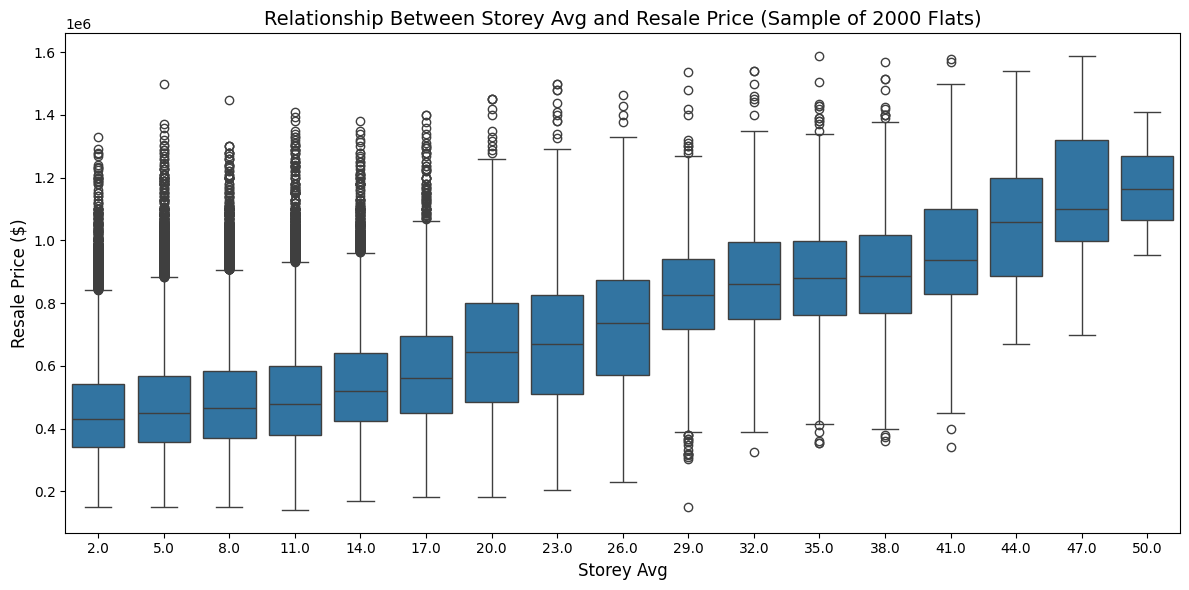

In [25]:
# Price by storey range

plt.figure(figsize=(12,6))
sns.boxplot(x='storey_avg', y='resale_price', data=df)
plt.title("Relationship Between Storey Avg and Resale Price (Sample of 2000 Flats)", fontsize=14)
plt.xlabel("Storey Avg", fontsize=12)
plt.ylabel("Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

Locational & Temporal Analysis

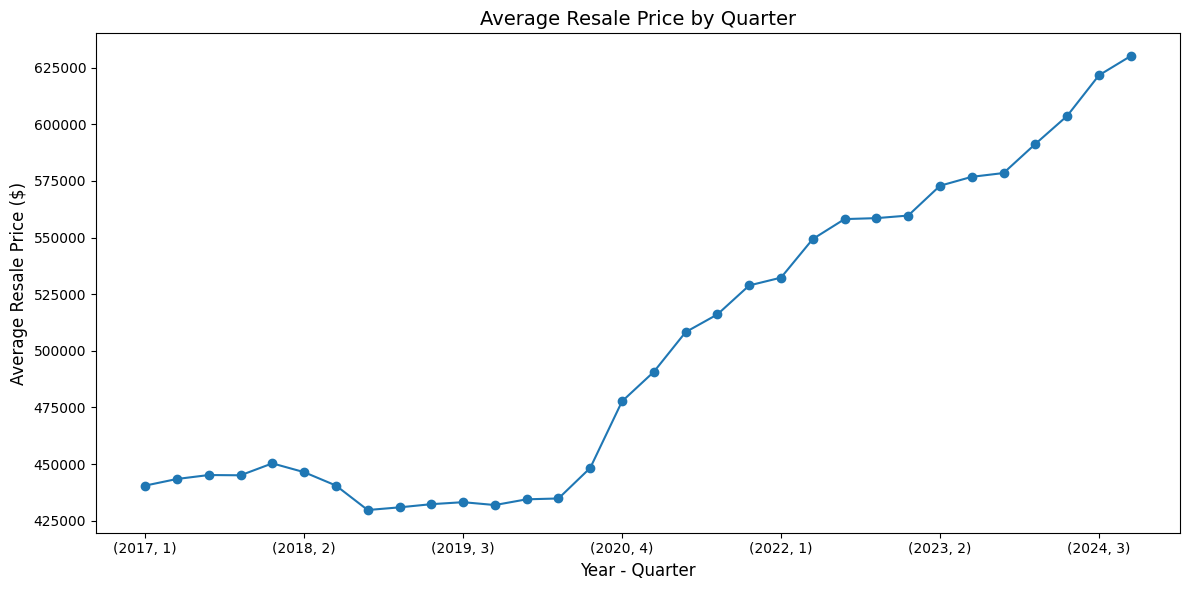

In [26]:
# Price by region 
# Create a year-quarter label, convert to string

df['year_quarter'] = df['year'].astype(str) + " Q" + df['quarter'].astype(str)

# Using quarter for time series analysis

quarterly = df.groupby(['year', 'quarter'])['resale_price'].mean()

plt.figure(figsize=(12,6))
quarterly.plot(marker='o')
plt.title("Average Resale Price by Quarter", fontsize=14)
plt.xlabel("Year - Quarter", fontsize=12)
plt.ylabel("Average Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

Investigate temporal factors (month)

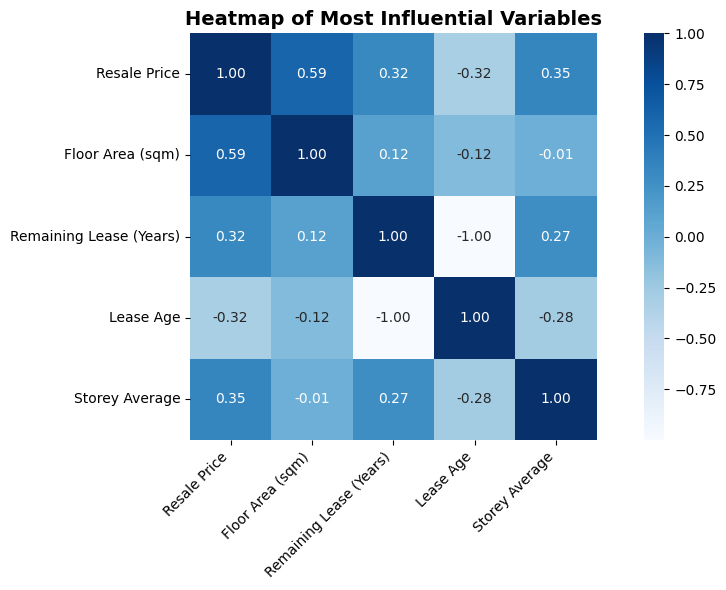

In [30]:
# Select Important Numeric Variables 
important_cols = ['resale_price','floor_area_sqm','remaining_lease_years','lease_age','storey_avg']

numeric_df = df[important_cols]

# Create Label Mapping for Prettier Heatmap Labels 
label_mapping = {
    'resale_price': 'Resale Price',
    'floor_area_sqm': 'Floor Area (sqm)',
    'remaining_lease_years': 'Remaining Lease (Years)',
    'lease_age': 'Lease Age',
    'storey_avg': 'Storey Average'
}

# Compute Correlation Matrix
corr = numeric_df.corr()

# Rename Labels for Display Only 
corr = corr.rename(index=label_mapping, columns=label_mapping)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title("Heatmap of Most Influential Variables", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()